<a href='https://srihar1-raman.github.io/srihari.github.io/'><img src='https://srihar1-raman.github.io/srihari.github.io/img/devjane.png'/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../DATA/mushrooms.csv")

In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

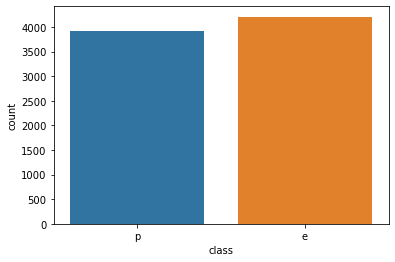

In [10]:
sns.countplot(data = df, x = "class")

In [11]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [12]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


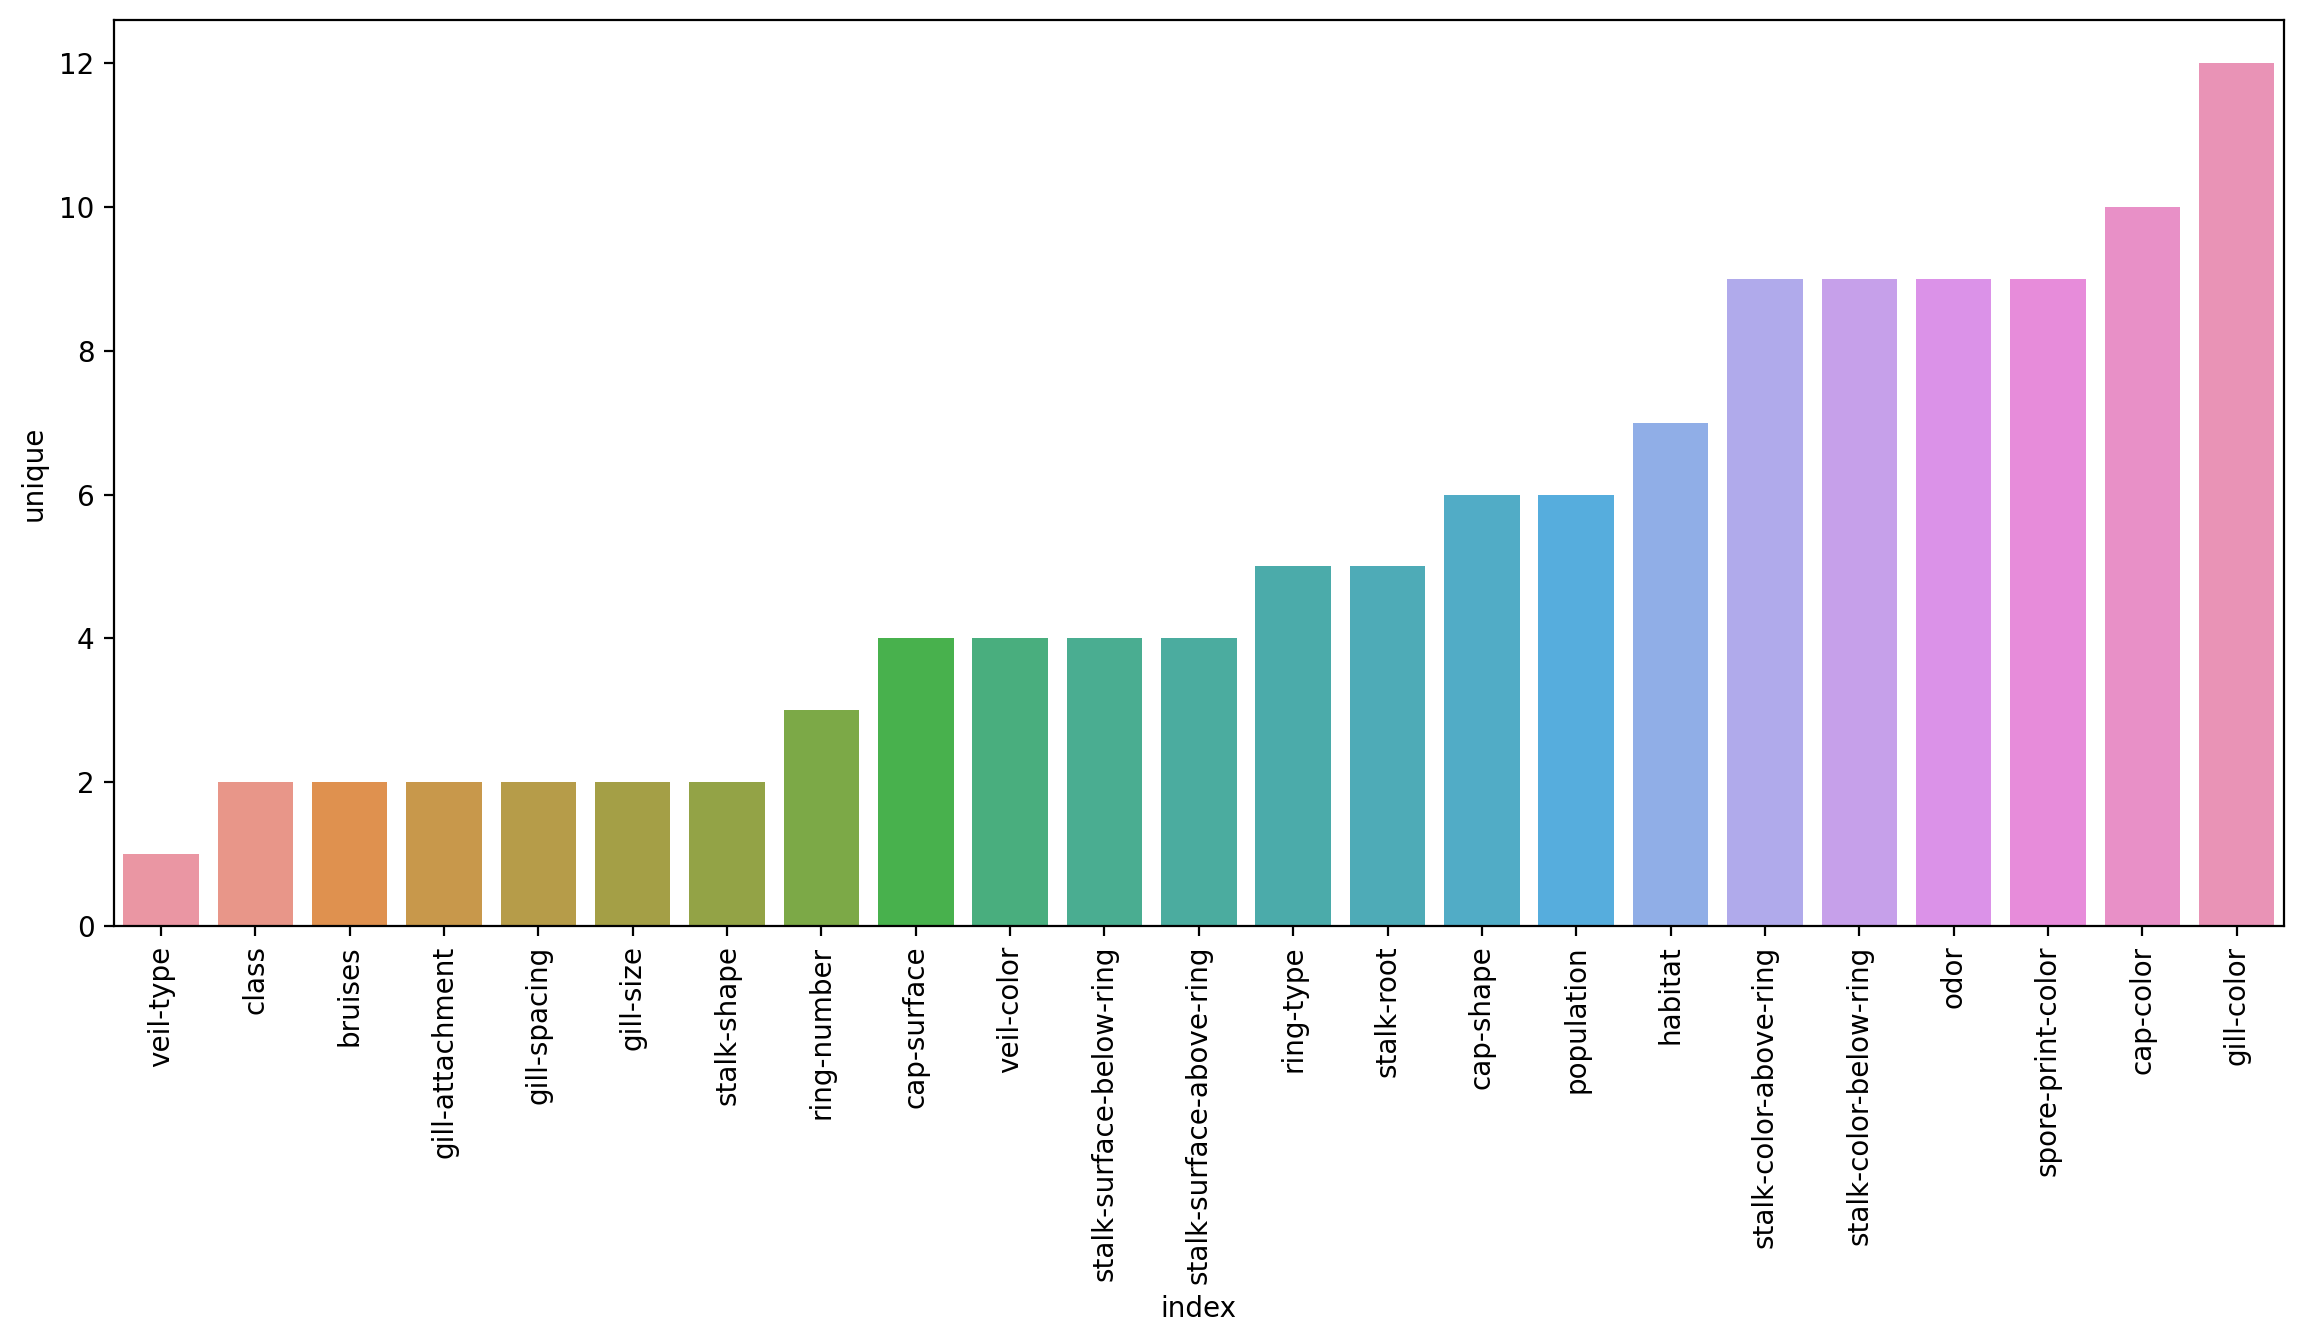

In [15]:
plt.figure(figsize = (14, 6), dpi = 200)
sns.barplot(data = df.describe().transpose().reset_index().sort_values("unique"), x = "index", y = "unique")
plt.xticks(rotation=90);

In [17]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop("class", axis = 1)
X = pd.get_dummies(X, drop_first=True)
y = df["class"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.ensemble import AdaBoostClassifier

In [26]:
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=1)

In [27]:
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

In [28]:
pred = model.predict(X_test)

In [29]:
pred

array(['e', 'p', 'p', ..., 'p', 'p', 'p'], dtype=object)

In [30]:
y_test

1971    e
6654    p
5606    p
3332    e
6988    p
       ..
7374    p
1149    e
4999    p
7497    p
3341    p
Name: class, Length: 1625, dtype: object

In [33]:
np.sum(y_test != pred)

198

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           e       0.96      0.79      0.87       843
           p       0.81      0.97      0.88       782

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625



In [39]:
model.feature_importances_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [42]:
dff = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns= ["importance"])
dff = dff[dff["importance"]>0.0005]
dff

,importance
odor_n,1.0


In [43]:
model.feature_importances_.argmax()

22

In [44]:
X.columns[22]

'odor_n'

<AxesSubplot:xlabel='odor', ylabel='count'>

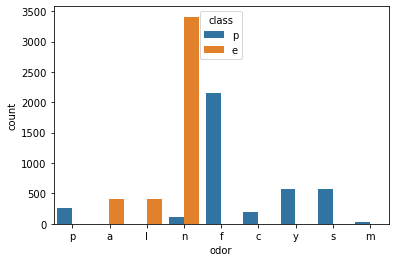

In [45]:
sns.countplot(data=df,x='odor',hue='class')

In [46]:
len(X.columns)

95

In [47]:
error = []

for n in range(1,96):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    err = 1 - accuracy_score(y_test,pred)
    
    error.append(err)

In [48]:
error

[0.12184615384615383,
 0.12184615384615383,
 0.08799999999999997,
 0.06461538461538463,
 0.053538461538461535,
 0.03753846153846152,
 0.02892307692307694,
 0.03200000000000003,
 0.02892307692307694,
 0.012307692307692353,
 0.03076923076923077,
 0.017846153846153845,
 0.024615384615384595,
 0.012307692307692353,
 0.0012307692307692575,
 0.0006153846153845732,
 0.0006153846153845732,
 0.0006153846153845732,
 0.0006153846153845732,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

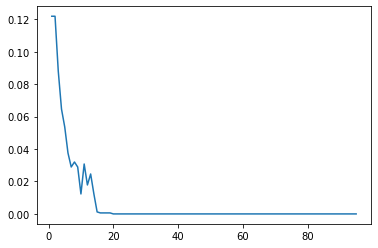

In [50]:
plt.plot(range(1,96),error)

In [51]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02105263, 0.        , 0.02105263, 0.03157895, 0.03157895,
       0.        , 0.        , 0.05263158, 0.02105263, 0.        ,
       0.        , 0.        , 0.11578947, 0.08421053, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.02105263, 0.        , 0.01052632, 0.        ,
       0.05263158, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.        , 0.01052632,
       0.02105263, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.01052632, 0.        , 0.     

In [52]:
dff = pd.DataFrame(index = X.columns, data = model.feature_importances_, columns= ["importance"])
dff = dff[dff["importance"]>0]
dff

,importance
cap-color_w,0.021053
bruises_t,0.021053
odor_c,0.031579
odor_f,0.031579
odor_n,0.052632
odor_p,0.021053
gill-spacing_w,0.115789
gill-size_n,0.084211
stalk-shape_t,0.031579
stalk-root_b,0.021053


In [55]:
dff = dff.sort_values("importance", ascending=False)
dff

,importance
spore-print-color_w,0.147368
gill-spacing_w,0.115789
population_c,0.105263
gill-size_n,0.084211
odor_n,0.052632
stalk-color-below-ring_n,0.052632
stalk-surface-above-ring_k,0.052632
spore-print-color_r,0.042105
stalk-shape_t,0.031579
stalk-surface-below-ring_y,0.031579


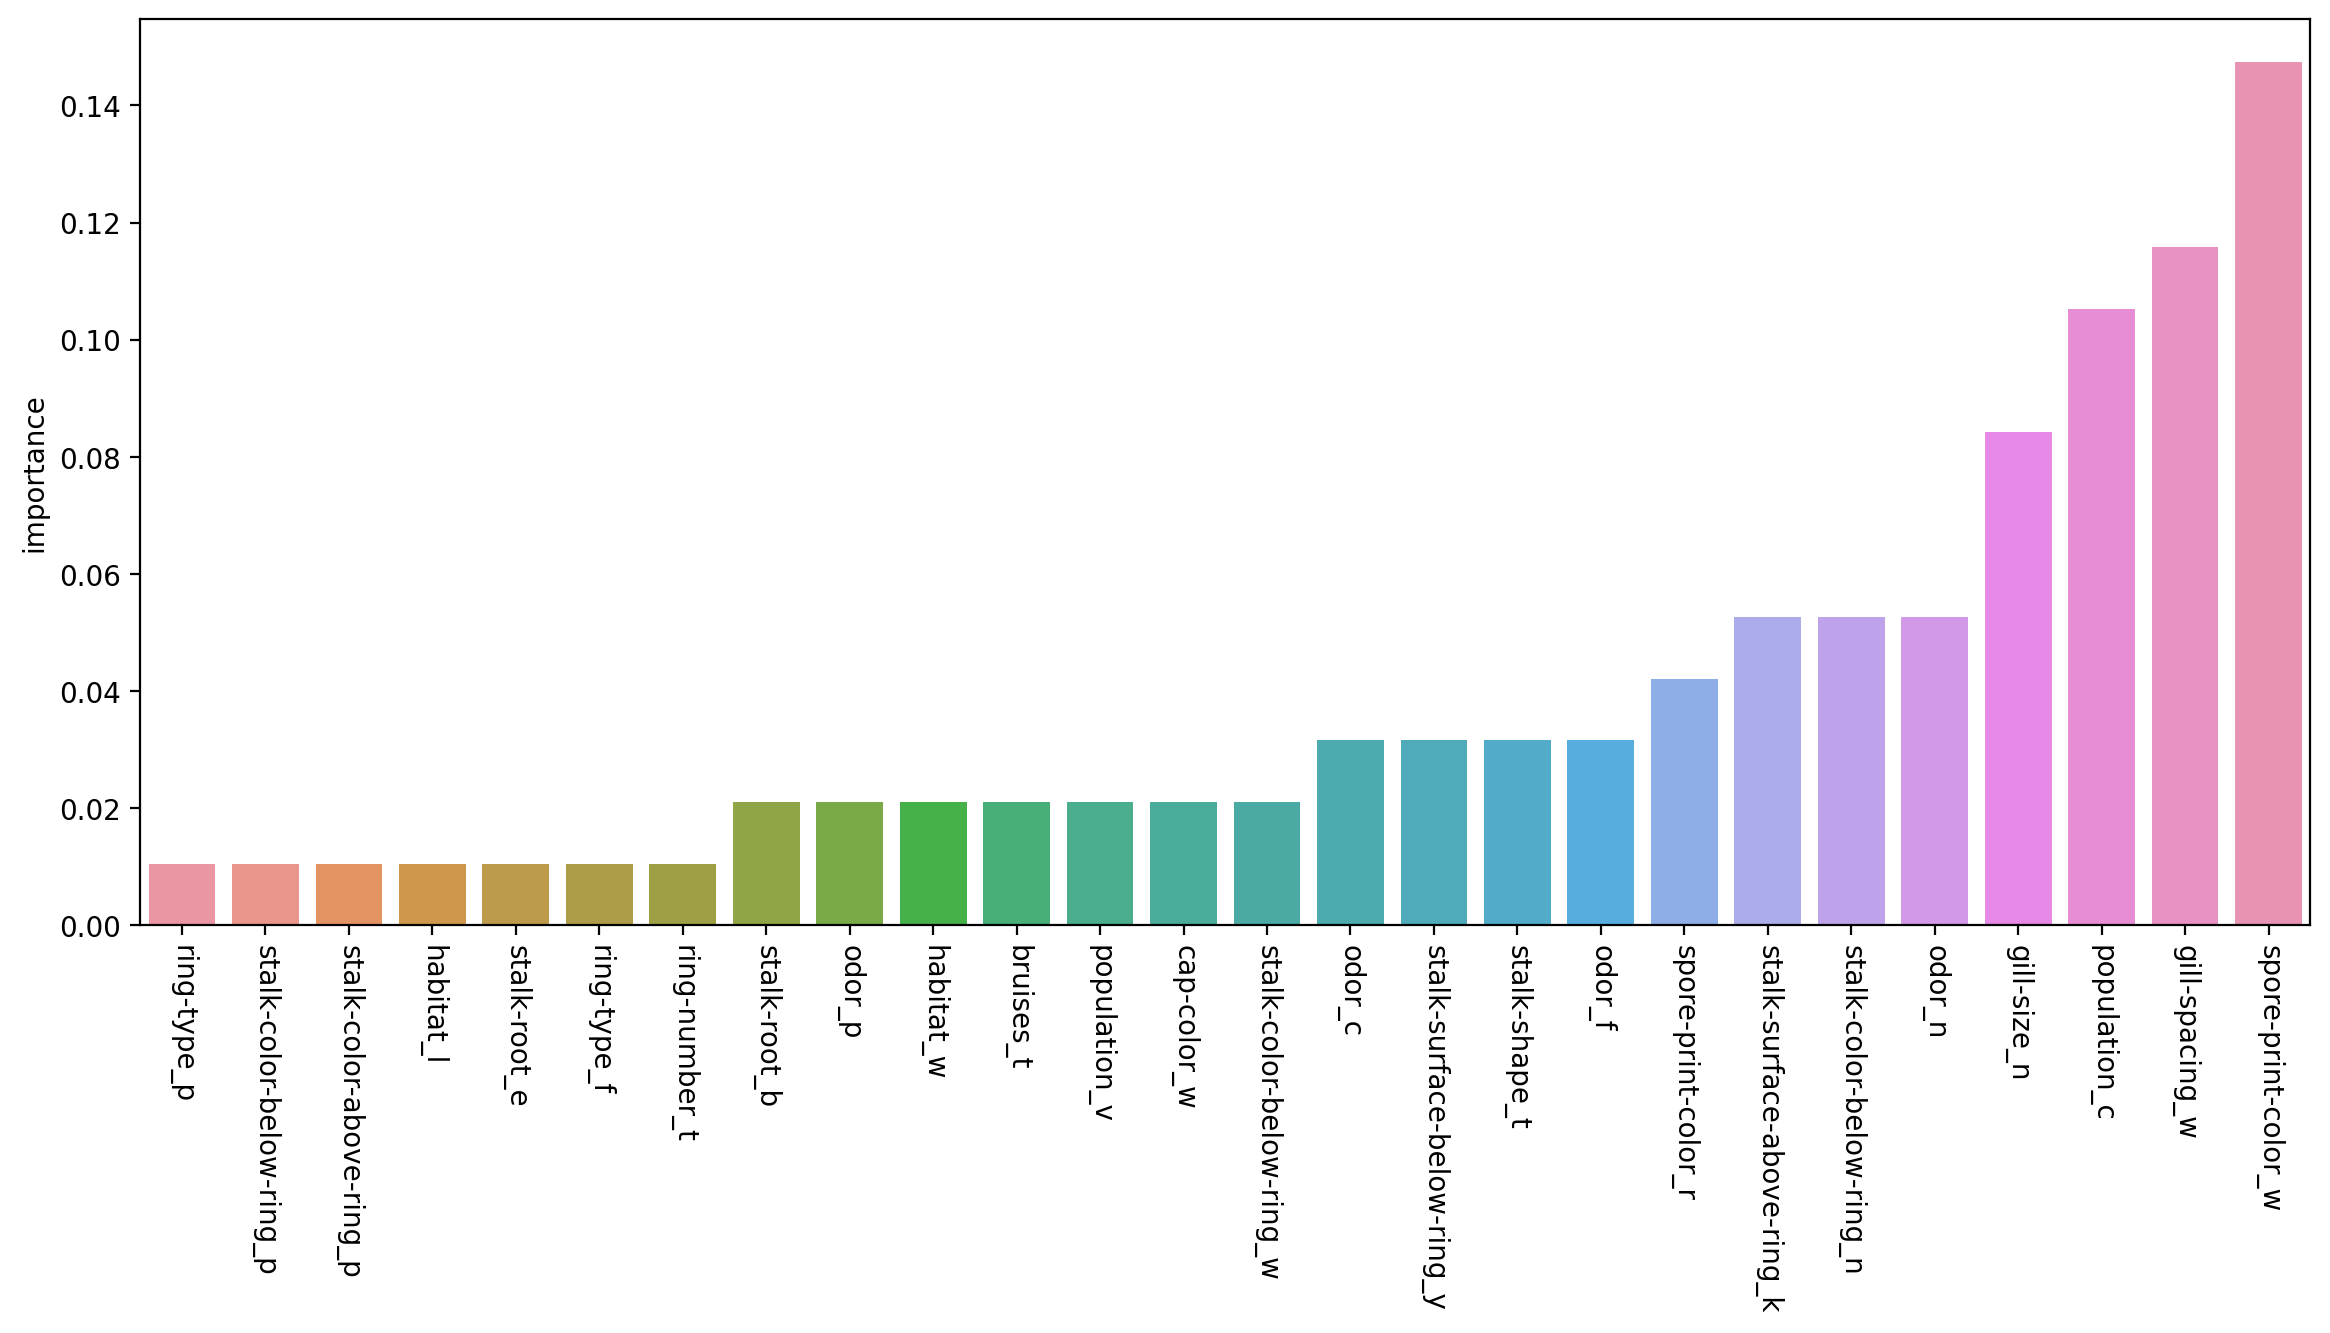

In [59]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=dff.sort_values('importance'),x=dff.sort_values('importance').index,y='importance')
plt.xticks(rotation=270);

<AxesSubplot:xlabel='spore-print-color', ylabel='count'>

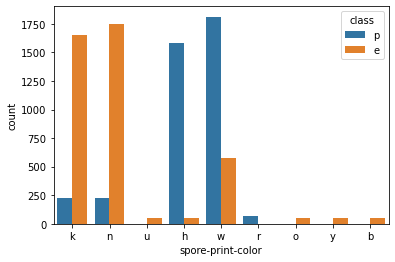

In [63]:
sns.countplot(data=df,x='spore-print-color',hue='class')

<AxesSubplot:xlabel='habitat', ylabel='count'>

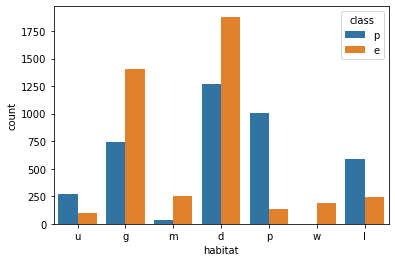

In [64]:
sns.countplot(data=df,x='habitat',hue='class')